In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

# from config import weather_api_key 
from config import weather_api_key
#Import datetime from datetime
from datetime import datetime

import requests

In [2]:
# create a set of random lats and longs combination
lats =np.random.uniform(-90,90,size=1500)
lngs =np.random.uniform(-180, 180, size =1500)
lats_lngs = zip(lats, lngs)
lats_lngs


In [3]:
#create a practice set of random lat and long
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]

coordinates = zip(x,y)


In [4]:
#Use the tuple() function to display the latitude and longitude combintaion
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Use the citipy module to determine city based on lats and longs
from citipy import citipy
coordinates = list(lats_lngs)

In [6]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
#            citipy.nearest_city(coordinate[0],coordinate[1]).country_code
#           )

In [7]:
# create the list of the cities which are unique

cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
cities
len(cities)

628

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935'

In [9]:
#Create an empty list to hold the weather data
city_data =[]

#print the begining of the logging
print("Begining Data Retrieval")
print("-----------------------")

#create counters
record_count = 1 
set_count = 1


# Loop through all the cities in our list:
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes:
    if (i%50==0 and i>50):
        set_count +=1
        record_count =1
    city = city.replace(" ","+")
    # create endpoint URL with each city.
    city_url = url+"&q="+city
    
    #logging the URL record, and set numbers and the city
    print(f"Processing Record {record_count} of set {set_count} | {city}")
    print(city_url)
    
    # Add 1  to the record count 
    record_count +=1
    
    # Run an API request for each of the cities.
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Begining Data Retrieval
-----------------------
Processing Record 1 of set 1 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=saint-philippe
Processing Record 2 of set 1 | miyako
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=miyako
Processing Record 3 of set 1 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=beringovskiy
Processing Record 4 of set 1 | zuwarah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=zuwarah
Processing Record 5 of set 1 | thaba+nchu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=thaba+nchu
Processing Record 6 of set 1 | jamestown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=jamestown
Processing Record 7 

Processing Record 56 of set 1 | cape+town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=cape+town
Processing Record 57 of set 1 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=dikson
Processing Record 58 of set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kruisfontein
Processing Record 59 of set 1 | pedernales
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=pedernales
Processing Record 60 of set 1 | hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=hermanus
Processing Record 61 of set 1 | chitral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=chitral
Processing Record 62 of set 1 | jiaojiang
http://api.openweathermap.org/da

Processing Record 10 of set 2 | kiama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kiama
Processing Record 11 of set 2 | el+tambo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=el+tambo
Processing Record 12 of set 2 | acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=acapulco
Processing Record 13 of set 2 | mar+del+plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mar+del+plata
Processing Record 14 of set 2 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ushuaia
Processing Record 15 of set 2 | shingu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=shingu
Processing Record 16 of set 2 | mumford
http://api.openweathermap.org/data/2.5/weath

Processing Record 14 of set 3 | tiznit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tiznit
Processing Record 15 of set 3 | harper
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=harper
Processing Record 16 of set 3 | vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vaitupu
City not found. Skipping...
Processing Record 17 of set 3 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lebu
Processing Record 18 of set 3 | santiago+del+estero
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=santiago+del+estero
Processing Record 19 of set 3 | black+river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=black+river
Processing Record 20 of set 3 | katobu
http:

Processing Record 17 of set 4 | tawkar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=tawkar
City not found. Skipping...
Processing Record 18 of set 4 | lompoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=lompoc
Processing Record 19 of set 4 | sao+filipe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=sao+filipe
Processing Record 20 of set 4 | hasaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=hasaki
Processing Record 21 of set 4 | bridgetown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bridgetown
Processing Record 22 of set 4 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bethel
Processing Record 23 of set 4 | conde
http://api.openweatherma

City not found. Skipping...
Processing Record 20 of set 5 | waspan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=waspan
Processing Record 21 of set 5 | skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=skjervoy
Processing Record 22 of set 5 | itarema
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=itarema
Processing Record 23 of set 5 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=amderma
City not found. Skipping...
Processing Record 24 of set 5 | vanimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vanimo
Processing Record 25 of set 5 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=pisco
Processing Record 26 of set 5 | kodiak
http:

Processing Record 23 of set 6 | mount+pleasant
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mount+pleasant
Processing Record 24 of set 6 | nouakchott
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=nouakchott
Processing Record 25 of set 6 | ucluelet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=ucluelet
Processing Record 26 of set 6 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=brae
Processing Record 27 of set 6 | katima+mulilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=katima+mulilo
Processing Record 28 of set 6 | vilyuysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vilyuysk
Processing Record 29 of set 6 | andra
http://api.openweathermap.

Processing Record 28 of set 7 | mys+shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=mys+shmidta
City not found. Skipping...
Processing Record 29 of set 7 | yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=yerbogachen
Processing Record 30 of set 7 | balgazyn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=balgazyn
Processing Record 31 of set 7 | minudasht
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=minudasht
Processing Record 32 of set 7 | le+port
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=le+port
Processing Record 33 of set 7 | stranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=stranda
Processing Record 34 of set 7 | mahadday+wey

Processing Record 32 of set 8 | guatire
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=guatire
Processing Record 33 of set 8 | grand+river+south+east
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=grand+river+south+east
City not found. Skipping...
Processing Record 34 of set 8 | la+asuncion
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=la+asuncion
Processing Record 35 of set 8 | paamiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=paamiut
Processing Record 36 of set 8 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=victoria
Processing Record 37 of set 8 | sistranda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=sistranda
Processing Record 38 o

Processing Record 36 of set 9 | omboue
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=omboue
Processing Record 37 of set 9 | hambantota
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=hambantota
Processing Record 38 of set 9 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kamenka
Processing Record 39 of set 9 | necochea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=necochea
Processing Record 40 of set 9 | aquiraz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=aquiraz
Processing Record 41 of set 9 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vestmanna
Processing Record 42 of set 9 | pokrovsk
http://api.openweathermap.org/data/2.5/weat

Processing Record 40 of set 10 | obihiro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=obihiro
Processing Record 41 of set 10 | bayugan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bayugan
Processing Record 42 of set 10 | prykolotne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=prykolotne
Processing Record 43 of set 10 | la+ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=la+ronge
Processing Record 44 of set 10 | vestbygda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=vestbygda
City not found. Skipping...
Processing Record 45 of set 10 | pahrump
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=pahrump
Processing Record 46 of set 10 | mayumba
http://

Processing Record 44 of set 11 | sigli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=sigli
Processing Record 45 of set 11 | quatre+cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=quatre+cocos
Processing Record 46 of set 11 | port+alberni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=port+alberni
Processing Record 47 of set 11 | bundaberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=bundaberg
Processing Record 48 of set 11 | kieta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=kieta
Processing Record 49 of set 11 | rimouski
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9c9d860d75e2657f902e68685d06f935&q=rimouski
Processing Record 50 of set 11 | kytlym
http://api.openweathermap.org/

In [10]:
print(city_data)

[{'City': 'Saint-Philippe', 'Lat': -21.3585, 'Lng': 55.7679, 'Max Temp': 81, 'Humidity': 57, 'Cloudiness': 0, 'Wind Speed': 5.75, 'Country': 'RE', 'Date': '2021-01-30 03:36:33'}, {'City': 'Miyako', 'Lat': 39.6367, 'Lng': 141.9525, 'Max Temp': 33.12, 'Humidity': 80, 'Cloudiness': 1, 'Wind Speed': 23.76, 'Country': 'JP', 'Date': '2021-01-30 03:41:48'}, {'City': 'Beringovskiy', 'Lat': 63.05, 'Lng': 179.3167, 'Max Temp': -18.15, 'Humidity': 83, 'Cloudiness': 0, 'Wind Speed': 10.27, 'Country': 'RU', 'Date': '2021-01-30 03:38:57'}, {'City': 'Zuwarah', 'Lat': 32.9312, 'Lng': 12.082, 'Max Temp': 59.99, 'Humidity': 52, 'Cloudiness': 0, 'Wind Speed': 15.77, 'Country': 'LY', 'Date': '2021-01-30 03:41:48'}, {'City': 'Thaba+Nchu', 'Lat': -29.2093, 'Lng': 26.839, 'Max Temp': 61.27, 'Humidity': 63, 'Cloudiness': 49, 'Wind Speed': 6.91, 'Country': 'ZA', 'Date': '2021-01-30 03:41:48'}, {'City': 'Jamestown', 'Lat': 42.097, 'Lng': -79.2353, 'Max Temp': 19, 'Humidity': 73, 'Cloudiness': 90, 'Wind Speed': 

In [11]:
# convert the city_data array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint-Philippe,-21.3585,55.7679,81.00,57,0,5.75,RE,2021-01-30 03:36:33
1,Miyako,39.6367,141.9525,33.12,80,1,23.76,JP,2021-01-30 03:41:48
2,Beringovskiy,63.0500,179.3167,-18.15,83,0,10.27,RU,2021-01-30 03:38:57
3,Zuwarah,32.9312,12.0820,59.99,52,0,15.77,LY,2021-01-30 03:41:48
4,Thaba+Nchu,-29.2093,26.8390,61.27,63,49,6.91,ZA,2021-01-30 03:41:48
5,Jamestown,42.0970,-79.2353,19.00,73,90,13.80,US,2021-01-30 03:35:52
6,Kano,12.0001,8.5167,60.80,20,0,6.91,NG,2021-01-30 03:41:48
7,Ust-Maya,60.4167,134.5333,-39.91,76,99,0.89,RU,2021-01-30 03:41:49
8,Tagusao,9.1924,117.8141,81.45,71,58,12.39,PH,2021-01-30 03:37:57
9,Kaitangata,-46.2817,169.8464,57.99,70,19,8.01,NZ,2021-01-30 03:37:52


In [12]:
# reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-01-30 03:36:33,-21.3585,55.7679,81.00,57,0,5.75
1,Miyako,JP,2021-01-30 03:41:48,39.6367,141.9525,33.12,80,1,23.76
2,Beringovskiy,RU,2021-01-30 03:38:57,63.0500,179.3167,-18.15,83,0,10.27
3,Zuwarah,LY,2021-01-30 03:41:48,32.9312,12.0820,59.99,52,0,15.77
4,Thaba+Nchu,ZA,2021-01-30 03:41:48,-29.2093,26.8390,61.27,63,49,6.91
5,Jamestown,US,2021-01-30 03:35:52,42.0970,-79.2353,19.00,73,90,13.80
6,Kano,NG,2021-01-30 03:41:48,12.0001,8.5167,60.80,20,0,6.91
7,Ust-Maya,RU,2021-01-30 03:41:49,60.4167,134.5333,-39.91,76,99,0.89
8,Tagusao,PH,2021-01-30 03:37:57,9.1924,117.8141,81.45,71,58,12.39
9,Kaitangata,NZ,2021-01-30 03:37:52,-46.2817,169.8464,57.99,70,19,8.01


In [14]:
# create the output file csv
output_data_file = "weather_data/cities.csv"

#Export the City Data into a csv
city_data_df.to_csv(output_data_file,index_label="City_ID")


### 6.3.1 == Scatter plots

In [15]:
# Extract relevant feilds from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

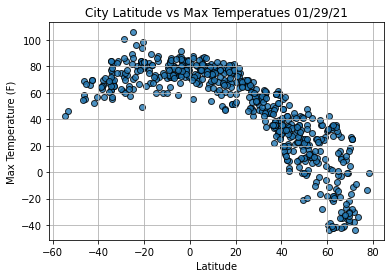

In [16]:
# import time module
import time
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1,marker="o", alpha=0.8, label="Cities")
plt.grid('True')
plt.title(f"City Latitude vs Max Temperatues " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")

#save the figures
plt.savefig("weather_data/lat_vs_max_temp.png")

#show plt
plt.show()

### 6.3.2 Scatter plot latitudes vs Humidity

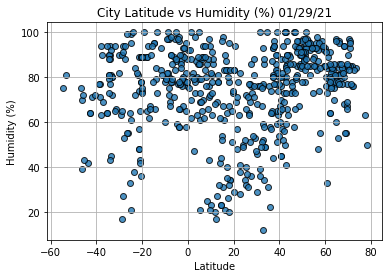

In [17]:
plt.scatter(lats, humidity,
            edgecolor="black", linewidths=1, marker="o", alpha=0.8,label="Cities"
            )
plt.grid("True")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) "+time.strftime("%x"))

#save the figure
plt.savefig("weather_data/lat_vs_humidity.png")

#show the plt
plt.show()

### 6.3.3 scatter plot lat vs cloudiness (%)

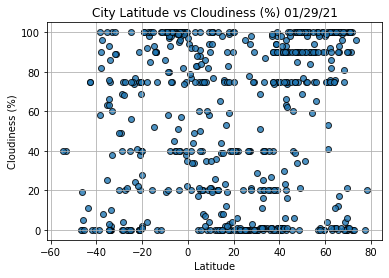

In [18]:
### 6.3.3 Scatter plot lat vs cloudiness (%)
plt.scatter(lats, cloudiness,
           edgecolor="black", marker="o", alpha=0.8, label="Cities")

plt.grid("True")
plt.title(f"City Latitude vs Cloudiness (%) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#save the fif
plt.savefig("weather_data/lat_vs_cloudiness.png")

#plot show
plt.show()

### 6.3.4 scatter plot vs Wind Speed

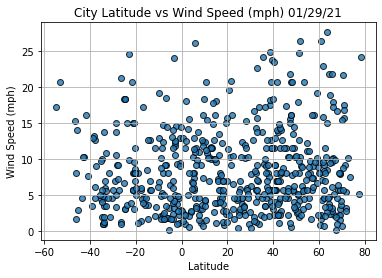

In [19]:
plt.scatter(lats, wind_speed,
            edgecolor="black",
            marker ="o",
            alpha=0.8,
            label="Cities"
            )
plt.grid("True")
plt.title(f"City Latitude vs Wind Speed (mph) "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#save the plot
plt.savefig("weather_data/lat_vs_windspeed.png")

#show the plt
plt.show()

### 6.4.2 function for creating scatter plot for linear regression 

In [63]:
# import linregress
from scipy.stats import linregress

#create a function for linear regression and plot a regress line and equation
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #run the regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # cal the regression line y-values from the slope and intercept
    regress_values = x_values * slope + intercept
    
    print(r_value)
    
    # get the line equation
    line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
    #create the scatter plot and plot the regression line
    plt.scatter(x_values, y_values, edgecolor="black")
    plt.grid("True")
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates , fontsize =15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2021-01-30 03:38:03
Lat                       63.7506
Lng                      -68.5145
Max Temp                      -13
Humidity                       70
Cloudiness                      1
Wind Speed                  27.63
Name: 13, dtype: object

In [65]:
# northern hemisphere cities
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]
northern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Miyako,JP,2021-01-30 03:41:48,39.6367,141.9525,33.12,80,1,23.76
2,Beringovskiy,RU,2021-01-30 03:38:57,63.0500,179.3167,-18.15,83,0,10.27
3,Zuwarah,LY,2021-01-30 03:41:48,32.9312,12.0820,59.99,52,0,15.77
5,Jamestown,US,2021-01-30 03:35:52,42.0970,-79.2353,19.00,73,90,13.80
6,Kano,NG,2021-01-30 03:41:48,12.0001,8.5167,60.80,20,0,6.91
7,Ust-Maya,RU,2021-01-30 03:41:49,60.4167,134.5333,-39.91,76,99,0.89
8,Tagusao,PH,2021-01-30 03:37:57,9.1924,117.8141,81.45,71,58,12.39
10,Saint-Louis,SN,2021-01-30 03:41:49,16.3333,-15.0000,69.21,21,23,10.54
11,Kapaa,US,2021-01-30 03:37:34,22.0752,-159.3190,75.20,78,40,16.11
13,Iqaluit,CA,2021-01-30 03:38:03,63.7506,-68.5145,-13.00,70,1,27.63


In [66]:
southern_hemi_df  = city_data_df.loc[city_data_df['Lat']<0]
southern_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint-Philippe,RE,2021-01-30 03:36:33,-21.3585,55.7679,81.00,57,0,5.75
4,Thaba+Nchu,ZA,2021-01-30 03:41:48,-29.2093,26.8390,61.27,63,49,6.91
9,Kaitangata,NZ,2021-01-30 03:37:52,-46.2817,169.8464,57.99,70,19,8.01
12,Avarua,CK,2021-01-30 03:36:23,-21.2078,-159.7750,82.40,74,75,8.05
14,Mahebourg,MU,2021-01-30 03:33:05,-20.4081,57.7000,78.80,89,40,8.05
15,Castro,BR,2021-01-30 03:38:09,-24.7911,-50.0119,62.58,95,100,3.09
16,Rikitea,PF,2021-01-30 03:37:33,-23.1203,-134.9692,80.19,72,24,9.82
18,Mataura,NZ,2021-01-30 03:37:32,-46.1927,168.8643,69.17,39,0,1.72
19,Busselton,AU,2021-01-30 03:33:19,-33.6500,115.3333,82.00,45,0,5.99
20,Dunedin,NZ,2021-01-30 03:37:40,-45.8742,170.5036,55.00,72,5,14.00


-0.8744061962941243


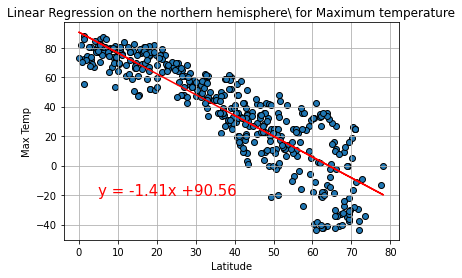

In [67]:
#linear regression on the northern hemisphers
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the northern hemisphere\ for Maximum temperature','Max Temp', (5,-20))

0.45349049233331495


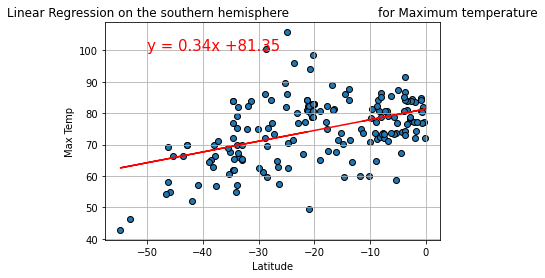

In [68]:
# linear regression on the southern hemispheres
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the southern hemisphere \
                      for Maximum temperature', 'Max Temp', (-50,100)
                       )

### 6.4.3 

0.29895837239625384


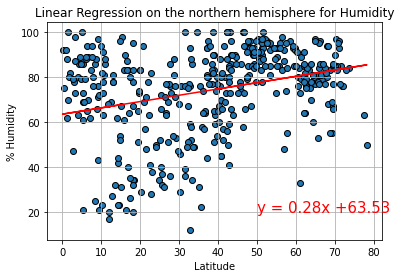

In [69]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Humidity', '% Humidity' , (50,20))

0.24205869297760182


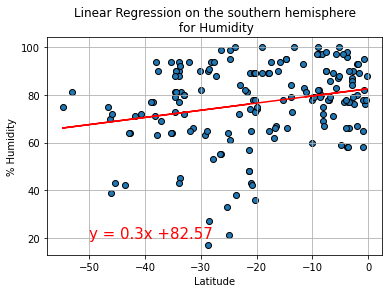

In [70]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere\n for Humidity', '% Humidity' , (-50,20))

0.22206192173626144


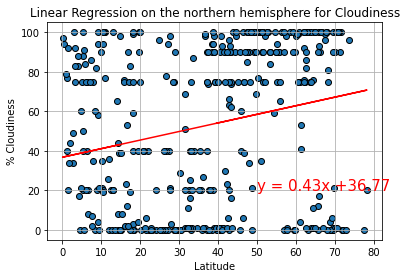

In [71]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Cloudiness', '% Cloudiness' , (50,20))

0.45523218788031544


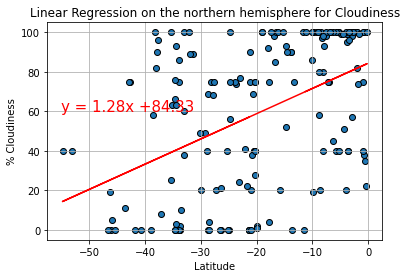

In [72]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere for Cloudiness', '% Cloudiness' , (-55,60))

0.04869136856267267


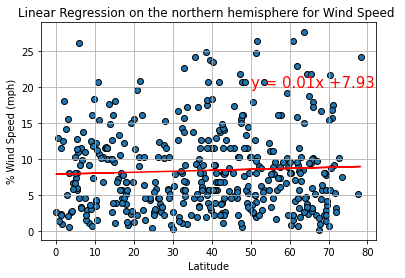

In [73]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the northern hemisphere for Wind Speed ', '% Wind Speed (mph)' , (50,20))

-0.08726146860001187


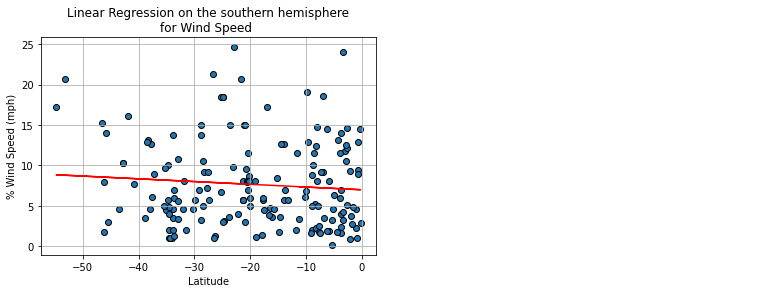

In [75]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the southern hemisphere\nfor Wind Speed (mph) ', '% Wind Speed (mph)' , (50,20))